###  Loading required Libraries

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np#provides a multidimensional array object, 
                    #as well as variations such as masks and matrices, which can be used for various math operations
import seaborn as sb #This library is used to visualize our data
import warnings

warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt #creates a figure, creates a plotting area in a figure, plots some lines in a plotting area
import matplotlib.pyplot as plyt
plt.style.use('seaborn-bright')
%matplotlib inline 

###  Importing dataset

In [3]:
movies = pd.read_csv("C:/Users/SONY/Downloads/movies_metadata.csv")

In [4]:
ratings = pd.read_csv("C:/Users/SONY/Desktop/projectfinal/New folder/ratings.csv")

In [5]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,movieid,imdb_id,original_language,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,english,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,30-10-1995,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,english,When siblings Judy and Peter discover an encha...,17.015539,...,15-12-1995,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,english,A family wedding reignites the ancient feud be...,11.712900,...,22-12-1995,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,english,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,22-12-1995,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,english,Just when George Banks has recovered from his ...,8.387519,...,10-02-1995,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
ratings.head()

,userId,movieid,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


###  Data preprocessing

In [7]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'movieid', 'imdb_id', 'original_language', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count'],
      dtype='object')

In [8]:
 movies = movies.drop(["belongs_to_collection","homepage","poster_path","tagline"],axis = 1)


In [9]:
movies.shape

(45463, 19)

In [10]:
ratings.shape

(1048575, 4)

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45463 non-null  bool   
 1   budget                45463 non-null  int64  
 2   genres                45463 non-null  object 
 3   movieid               45463 non-null  int64  
 4   imdb_id               45446 non-null  object 
 5   original_language     45452 non-null  object 
 6   overview              44509 non-null  object 
 7   popularity            45460 non-null  float64
 8   production_companies  45460 non-null  object 
 9   production_countries  45460 non-null  object 
 10  release_date          45376 non-null  object 
 11  revenue               45460 non-null  float64
 12  runtime               45203 non-null  float64
 13  spoken_languages      45460 non-null  object 
 14  status                45379 non-null  object 
 15  title              

In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1048575 non-null  int64  
 1   movieid    1048575 non-null  int64  
 2   rating     1048575 non-null  float64
 3   timestamp  1048575 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 32.0 MB


###  Descriptive analysis

In [13]:
movies.describe().round(0)

,budget,movieid,popularity,revenue,runtime,vote_average,vote_count
count,45463.0,45463.0,45460.0,4.546000e+04,45203.0,45460.0,45460.0
mean,4224579.0,108360.0,3.0,1.120935e+07,94.0,6.0,110.0
std,17424133.0,112461.0,6.0,6.433225e+07,38.0,2.0,491.0
min,0.0,2.0,0.0,0.000000e+00,0.0,0.0,0.0
25%,0.0,26450.0,0.0,0.000000e+00,85.0,5.0,3.0
50%,0.0,60003.0,1.0,0.000000e+00,95.0,6.0,10.0
75%,0.0,157328.0,4.0,0.000000e+00,107.0,7.0,34.0
max,380000000.0,469172.0,547.0,2.787965e+09,1256.0,10.0,14075.0


In [14]:
#movies.describe().round(0).to_csv("my_description.csv")


In [15]:
ratings.describe().round(0)

,userId,movieid,rating,timestamp
count,1048575.0,1048575.0,1048575.0,1.048575e+06
mean,5379.0,16159.0,4.0,1.173062e+09
std,3065.0,31267.0,1.0,2.045386e+08
min,1.0,1.0,0.0,8.255829e+08
25%,2728.0,1080.0,3.0,9.922286e+08
50%,5383.0,2642.0,4.0,1.159314e+09
75%,8060.0,6643.0,4.0,1.354659e+09
max,10656.0,176271.0,5.0,1.501822e+09


In [16]:
#ratings.describe().round(0).to_csv("my_description1.csv")

In [17]:
movies["original_language"] = movies["original_language"].astype("category")
movies["spoken_languages"] = movies["spoken_languages"].astype("category")
movies["status"] = movies["status"].astype("category")
movies['popularity'] = movies['popularity'].astype('float')
movies['budget'] = pd.to_numeric(movies['budget']) 
movies['popularity'] = movies['popularity'].astype('float')

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   adult                 45463 non-null  bool    
 1   budget                45463 non-null  int64   
 2   genres                45463 non-null  object  
 3   movieid               45463 non-null  int64   
 4   imdb_id               45446 non-null  object  
 5   original_language     45452 non-null  category
 6   overview              44509 non-null  object  
 7   popularity            45460 non-null  float64 
 8   production_companies  45460 non-null  object  
 9   production_countries  45460 non-null  object  
 10  release_date          45376 non-null  object  
 11  revenue               45460 non-null  float64 
 12  runtime               45203 non-null  float64 
 13  spoken_languages      45460 non-null  category
 14  status                45379 non-null  category
 15  ti

In [19]:
print(movies['status'].describe())
print(movies['original_language'].describe())
print(movies['spoken_languages'].describe())


count        45379
unique           6
top       Released
freq         45014
Name: status, dtype: object
count       45452
unique         89
top       english
freq        32269
Name: original_language, dtype: object
count                                        45460
unique                                        1931
top       [{'iso_639_1': 'en', 'name': 'English'}]
freq                                         22395
Name: spoken_languages, dtype: object


In [20]:
print(movies.isnull().sum())
movies.isnull().sum().to_csv("null.csv")



adult                     0
budget                    0
genres                    0
movieid                   0
imdb_id                  17
original_language        11
overview                954
popularity                3
production_companies      3
production_countries      3
release_date             87
revenue                   3
runtime                 260
spoken_languages          3
status                   84
title                     3
video                     3
vote_average              3
vote_count                3
dtype: int64


In [21]:
movies = movies.dropna()

In [22]:
print(movies.isnull().sum())

adult                   0
budget                  0
genres                  0
movieid                 0
imdb_id                 0
original_language       0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64


In [23]:
print(ratings.isnull().sum())

userId       0
movieid      0
rating       0
timestamp    0
dtype: int64


In [24]:
movies.duplicated().sum()

17

In [25]:
movies.drop_duplicates(inplace = True)

In [26]:
movies.duplicated().sum()

0

In [27]:
ratings.duplicated().sum()

0

<AxesSubplot:xlabel='rating'>

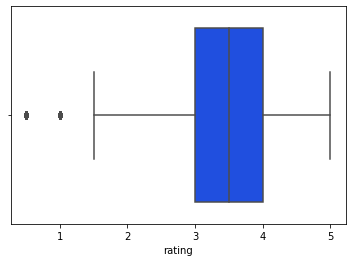

In [28]:
sb.boxplot(x=ratings['rating'])

In [29]:
# To recommend a good movie there needs to be a metric or rating, so a score is needed for each movie, 
#take the scores and use that data to recommend the best movies.
#So minimum rating average is approximately 6

In [30]:
C = movies['vote_average'].mean()
C

5.646896147252264

In [31]:
#Find the minimum amount of votes to be listed.
#Find the movies that have at least 90% more votes than the others.

In [32]:
m = movies['vote_count'].quantile(0.9)
m

166.0

In [33]:
#Using these last 2 values 
#I can now add them to the weighted rating formula to get a list of movies that will be recommended.
lists_movies =movies.copy().loc[movies['vote_count'] >= m]

lists_movies.shape

(4435, 19)

In [34]:
#Now I have new list of highest rated movies (4555)

In [37]:
movies.corr()
#movies.corr().to_csv("corr.csv")

<AxesSubplot:>

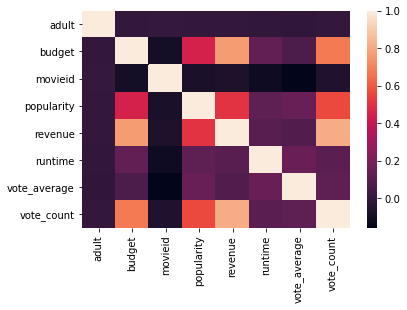

In [36]:
 sb.heatmap(movies.corr())

In [33]:
movies['original_language'].value_counts()

english     32052
french       2277
japenese     1345
italian      1264
german        961
            ...  
fy              1
eo              1
cy              1
ay              1
zu              1
Name: original_language, Length: 89, dtype: int64

In [34]:
movies['status'].value_counts()

Released           43994
Rumored              213
Post Production       96
In Production         16
Planned               12
Canceled               1
Name: status, dtype: int64

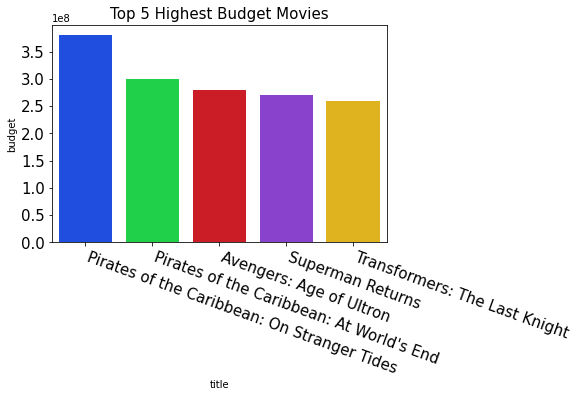

In [142]:
cols = ['title', 'budget']
budget_movies = movies.sort_values('budget', ascending=False)[cols].set_index('title')
top_5 = budget_movies.head(5)
sb.barplot(data=top_5, x=top_5.index, y='budget');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.title('Top 5 Highest Budget Movies', fontsize=15);

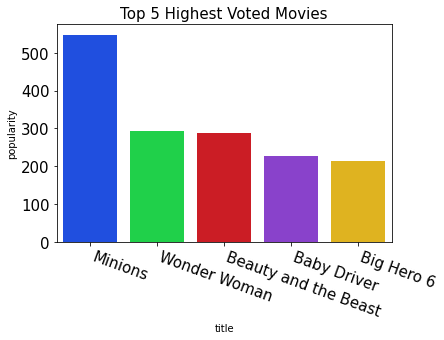

In [36]:
cols = ['title', 'popularity']
popularity_movies = movies.sort_values('popularity', ascending=False)[cols].set_index('title')
top_5 = popularity_movies.head(5)
sb.barplot(data=top_5, x=top_5.index, y='popularity');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.title('Top 5 Highest Voted Movies', fontsize=15);

<AxesSubplot:xlabel='vote_average'>

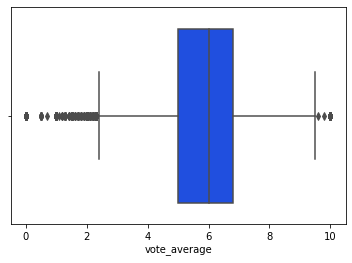

In [136]:
sb.boxplot(x=movies['vote_average'])

<function matplotlib.pyplot.show(close=None, block=None)>

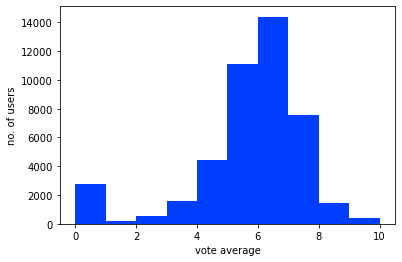

In [139]:
plt.hist(movies['vote_average'])
plt.xlabel("vote average")
plt.ylabel("no. of users")
plt.show

Text(0.5, 1.0, 'Popular Movies')

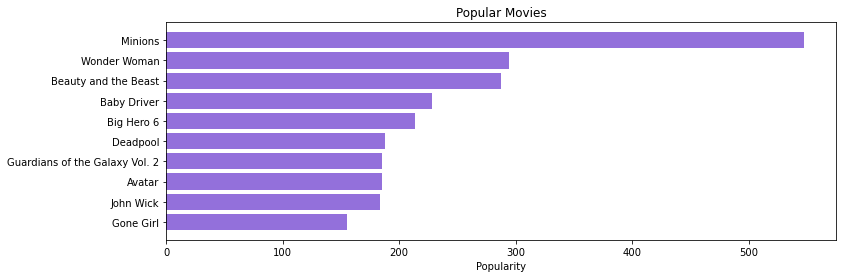

In [97]:
pop= movies.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',color='mediumpurple')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

<function matplotlib.pyplot.show(close=None, block=None)>

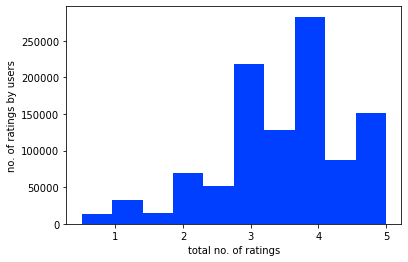

In [140]:
plt.hist(ratings['rating'])
plt.xlabel("total no. of ratings")
plt.ylabel("no. of ratings by users")
plt.show

In [100]:
no_user_voted = ratings.groupby('movieid')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

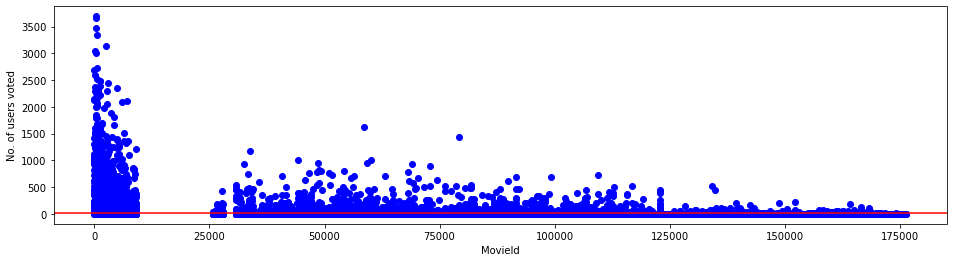

In [143]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='blue')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

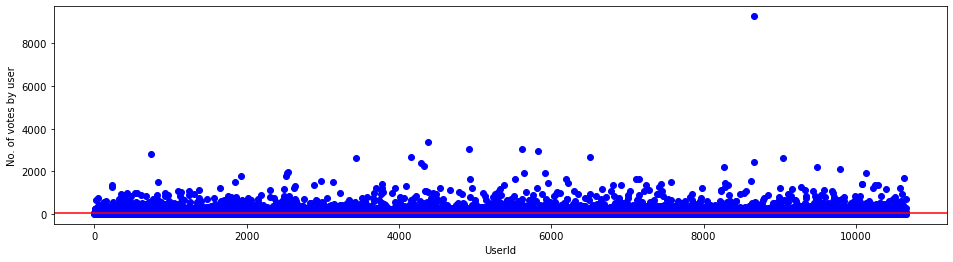

In [144]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='blue')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [37]:
movie_data=pd.merge(ratings,movies,on='movieid')
movie_data.head(3)

,userId,movieid,rating,timestamp,adult,budget,genres,imdb_id,original_language,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,1,110,1.0,1425941529,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0
1,11,110,3.5,1231676989,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0
2,22,110,5.0,1111937009,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0


In [38]:
trend=pd.DataFrame(movie_data.groupby('title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count()) 
trend.head()

,rating,total number of ratings
title,,
!Women Art Revolution,3.014706,34
$5 a Day,2.000000,8
'Gator Bait,3.583333,6
'R Xmas,3.666667,6
'Twas the Night Before Christmas,3.718750,16


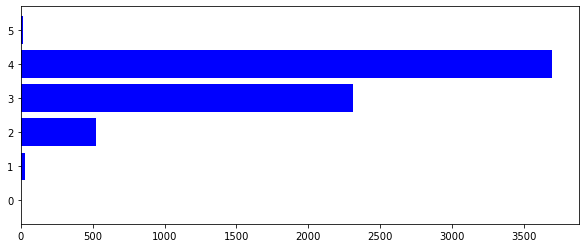

In [39]:
plt.figure(figsize =(10, 4))
ax=plt.barh(trend['rating'].round(),trend['total number of ratings'],color='b')
plt.show()

In [40]:
rating_count_df = pd.DataFrame(movie_data.groupby(['rating']).size(), columns=['count'])
rating_count_df



,count
rating,
0.5,5415
1.0,15453
1.5,5685
2.0,31980
2.5,19280
3.0,103157
3.5,47491
4.0,124523
4.5,32555


In [41]:
movies1 = movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()
movies1.head()

title
Frida              5.0
8MM                5.0
Last Train Home    5.0
Piggy              5.0
Chimpanzee         5.0
Name: rating, dtype: float64

In [42]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [43]:
normalized = preprocessing.normalize(ratings)

In [44]:
scaler =MinMaxScaler()

In [45]:
scaled_df = pd.DataFrame(scaler.fit_transform(ratings),columns = ratings.columns)
scaled_df

,userId,movieid,rating,timestamp
0,0.0,0.000618,0.111111,0.887790
1,0.0,0.000828,0.888889,0.887791
2,0.0,0.004862,1.000000,0.887790
3,0.0,0.006921,1.000000,0.887790
4,0.0,0.007063,1.000000,0.887790
...,...,...,...,...
1048570,1.0,0.009117,0.333333,0.120035
1048571,1.0,0.009128,0.555556,0.120035
1048572,1.0,0.009151,0.555556,0.120033
1048573,1.0,0.009162,0.111111,0.120035


In [46]:
print(scaled_df)

         userId   movieid    rating  timestamp
0           0.0  0.000618  0.111111   0.887790
1           0.0  0.000828  0.888889   0.887791
2           0.0  0.004862  1.000000   0.887790
3           0.0  0.006921  1.000000   0.887790
4           0.0  0.007063  1.000000   0.887790
...         ...       ...       ...        ...
1048570     1.0  0.009117  0.333333   0.120035
1048571     1.0  0.009128  0.555556   0.120035
1048572     1.0  0.009151  0.555556   0.120033
1048573     1.0  0.009162  0.111111   0.120035
1048574     1.0  0.009168  0.777778   0.120150

[1048575 rows x 4 columns]


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Splitting the data into training and testing

In [48]:
X = movie_data[['userId', 'movieid']].values
y = movie_data['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((410915, 2), (45658, 2), (410915,), (45658,))

In [49]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [50]:
X_train, X_train_array, X_train_array[0].shape

(array([[ 1288,  4896],
        [10094,  2791],
        [  640,  4993],
        ...,
        [ 8718,   466],
        [ 3784,  2640],
        [10485,  8645]], dtype=int64),
 [array([ 1288, 10094,   640, ...,  8718,  3784, 10485], dtype=int64),
  array([4896, 2791, 4993, ...,  466, 2640, 8645], dtype=int64)],
 (410915,))

In [51]:
#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1)
plt.rcParams["axes.grid"] = False
#plt.style.use('dark_background')
%matplotlib inline

In [52]:
movies_average_rating=movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).reset_index().rename(columns={'rating':'Average Rating'})
movies_average_rating.head()

,title,Average Rating
0,Frida,5.0
1,8MM,5.0
2,Last Train Home,5.0
3,Piggy,5.0
4,Chimpanzee,5.0


In [53]:
movies_rating_count=movie_data.groupby('title')['rating'].count().sort_values(ascending=True).reset_index().rename(columns={'rating':'Rating Count'}) #ascending=False
movies_rating_count_avg=movies_rating_count.merge(movies_average_rating, on='title')
movies_rating_count_avg.head()

,title,Rating Count,Average Rating
0,Mr. Peabody & Sherman,1,4.0
1,No One Killed Jessica,1,3.5
2,Magic,1,3.5
3,Magic Magic,1,3.0
4,Case départ,1,4.0


Eliminating Outliers

In [54]:
rating_with_RatingCount = movie_data.merge(movies_rating_count, left_on = 'title', right_on = 'title', how = 'left')
rating_with_RatingCount.head()

,userId,movieid,rating,timestamp,adult,budget,genres,imdb_id,original_language,overview,...,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,Rating Count
0,1,110,1.0,1425941529,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0,2594
1,11,110,3.5,1231676989,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0,2594
2,22,110,5.0,1111937009,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0,2594
3,24,110,5.0,979870012,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0,2594
4,29,110,3.0,1044020005,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,27-05-1994,0.0,99.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.8,246.0,2594


In [55]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(rating_with_RatingCount['Rating Count'].describe())

count   456573.000
mean       819.375
std        807.667
min          1.000
25%        221.000
50%        548.000
75%       1115.000
max       3692.000
Name: Rating Count, dtype: float64


In [56]:
popularity_threshold = 50
popular_movies= rating_with_RatingCount[rating_with_RatingCount['Rating Count']>=popularity_threshold]
popular_movies.head()
#popular_movies.shape

,userId,movieid,rating,timestamp,adult,budget,genres,imdb_id,original_language,overview,...,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count,Rating Count
0,1,110,1.000,1425941529,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,27-05-1994,0.000,99.000,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.800,246.000,2594
1,11,110,3.500,1231676989,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,27-05-1994,0.000,99.000,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.800,246.000,2594
2,22,110,5.000,1111937009,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,27-05-1994,0.000,99.000,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.800,246.000,2594
3,24,110,5.000,979870012,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,27-05-1994,0.000,99.000,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.800,246.000,2594
4,29,110,3.000,1044020005,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",tt0111495,french,Red This is the third film from the trilogy by...,...,27-05-1994,0.000,99.000,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Three Colors: Red,False,7.800,246.000,2594


Creating kNN Model

Pivotting title as indices & userId as columns

In [57]:
import os
movie_features_df=popular_movies.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df.head()
#movie_features_df.to_excel('output.xlsx')

userId,1,2,3,4,5,6,7,8,9,10,...,10645,10646,10647,10648,10649,10651,10652,10653,10655,10656
title,,,,,,,,,,,,,,,,,,,,,
10 Items or Less,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10 Things I Hate About You,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1984,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2 Days in Paris,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"20,000 Leagues Under the Sea",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.500,2.000


In [58]:
from scipy.sparse import csr_matrix
movie_features_df_matrix = csr_matrix(movie_features_df.values)

In [59]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(movie_features_df_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [60]:
movie_features_df.shape

(1271, 10447)

In [61]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)
#query_index=196


786


In [62]:
movie_features_df.head()

userId,1,2,3,4,5,6,7,8,9,10,...,10645,10646,10647,10648,10649,10651,10652,10653,10655,10656
title,,,,,,,,,,,,,,,,,,,,,
10 Items or Less,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10 Things I Hate About You,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1984,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2 Days in Paris,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
"20,000 Leagues Under the Sea",0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.500,2.000


In [63]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(movie_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, movie_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Run Lola Run:

1: Ali: Fear Eats the Soul, with distance of 0.5675465337135652:
2: Mrs. Doubtfire, with distance of 0.5962681658073916:
3: Kolya, with distance of 0.5999404889779274:
4: Get Carter, with distance of 0.615465699365491:
5: The Passion of Joan of Arc, with distance of 0.621807473992549:
